In [5]:
import pandas as pd

# Load the provided CSV file to examine its structure
file_path = "../problem2/predicted_future_volumes_hours.csv"
predicted_volumes = pd.read_csv(file_path)
# Convert the date-time string to a datetime object
predicted_volumes["日期时间"] = pd.to_datetime(predicted_volumes["日期时间"])

# Define the shift times
shift_times = {
    "00:00-08:00": ("00:00", "08:00"),
    "05:00-13:00": ("05:00", "13:00"),
    "08:00-16:00": ("08:00", "16:00"),
    "12:00-20:00": ("12:00", "20:00"),
    "14:00-22:00": ("14:00", "22:00"),
    "16:00-24:00": ("16:00", "24:00"),
}


# Create a function to assign each hour to a shift
def assign_shift(hour):
    for shift, (start, end) in shift_times.items():
        if start <= hour.strftime("%H:%M") < end:
            return shift
    return None


# Apply the function to assign shifts
predicted_volumes["班次"] = predicted_volumes["日期时间"].apply(
    lambda x: assign_shift(x)
)

# Group by center, date, and shift to sum up volumes
grouped_volumes = (
    predicted_volumes.groupby(
        ["分拣中心", predicted_volumes["日期时间"].dt.date, "班次"]
    )["货量"]
    .sum()
    .reset_index()
)
grouped_volumes.rename(columns={"日期时间": "日期"}, inplace=True)

for special_SC in grouped_volumes["分拣中心"].unique():
    grouped_volumes = grouped_volumes[grouped_volumes["分拣中心"] == special_SC]
    print(grouped_volumes)

         分拣中心          日期           班次            货量
0    分拣中心_SC1  2023-12-01  00:00-08:00  22778.161034
1    分拣中心_SC1  2023-12-01  05:00-13:00  10523.541881
2    分拣中心_SC1  2023-12-01  08:00-16:00   2945.949066
3    分拣中心_SC1  2023-12-01  12:00-20:00   5366.449210
4    分拣中心_SC1  2023-12-01  14:00-22:00   6548.729409
..        ...         ...          ...           ...
181  分拣中心_SC1  2023-12-31  05:00-13:00  12101.380091
182  分拣中心_SC1  2023-12-31  08:00-16:00   3782.370313
183  分拣中心_SC1  2023-12-31  12:00-20:00   7134.298153
184  分拣中心_SC1  2023-12-31  14:00-22:00   6497.182409
185  分拣中心_SC1  2023-12-31  16:00-24:00   7321.304101

[186 rows x 4 columns]
Empty DataFrame
Columns: [分拣中心, 日期, 班次, 货量]
Index: []
Empty DataFrame
Columns: [分拣中心, 日期, 班次, 货量]
Index: []
Empty DataFrame
Columns: [分拣中心, 日期, 班次, 货量]
Index: []
Empty DataFrame
Columns: [分拣中心, 日期, 班次, 货量]
Index: []
Empty DataFrame
Columns: [分拣中心, 日期, 班次, 货量]
Index: []
Empty DataFrame
Columns: [分拣中心, 日期, 班次, 货量]
Index: []
Empty DataFrame


In [16]:
data = """分配中心,日期,小时,预测货量
SC14,2023-12-01,0,71.81666666666666
SC14,2023-12-01,1,71.81666666666666
SC14,2023-12-01,2,71.81666666666666
SC14,2023-12-01,3,71.81666666666666
SC14,2023-12-01,4,71.81666666666666
SC14,2023-12-01,5,101.65666666666668
SC14,2023-12-01,6,117.33666666666666
SC14,2023-12-01,7,68.72666666666667
SC14,2023-12-01,8,76.79154761904765
SC14,2023-12-01,9,104.46576984126985
SC14,2023-12-01,10,106.61277777777778
SC14,2023-12-01,11,149.3447380952381
SC14,2023-12-01,12,2.7871190476190475
SC14,2023-12-01,13,102.0495714285714
SC14,2023-12-01,14,168.87423015873014
SC14,2023-12-01,15,148.3816865079365
SC14,2023-12-01,16,112.3909404761905
SC14,2023-12-01,17,99.52757570207568
SC14,2023-12-01,18,43.27497619047618
SC14,2023-12-01,19,132.01944444444447
SC14,2023-12-01,20,115.97620601620604
SC14,2023-12-01,21,77.28322222222221
SC14,2023-12-01,22,54.38195238095238
SC14,2023-12-01,23,17.495702380952384"""

from io import StringIO
data = StringIO(data)
df = pd.read_csv(data)
df

,分配中心,日期,小时,预测货量
0,SC14,2023-12-01,0,71.816667
1,SC14,2023-12-01,1,71.816667
2,SC14,2023-12-01,2,71.816667
3,SC14,2023-12-01,3,71.816667
4,SC14,2023-12-01,4,71.816667
5,SC14,2023-12-01,5,101.656667
6,SC14,2023-12-01,6,117.336667
7,SC14,2023-12-01,7,68.726667
8,SC14,2023-12-01,8,76.791548
9,SC14,2023-12-01,9,104.465770


In [17]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime

from scipy.integrate import odeint
from scipy import linalg as la
from scipy import optimize
import scipy
import csv
import pandas as pd

config = {
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{CJK}",  # 预先导入CJK宏包处理中文
}
plt.rcParams.update(config)

In [19]:
new_data = """分拣中心,日期,班次,正式工,临时工
分拣中心_SC14,2023-12-01,00:00-08:00,26.0,0.0
分拣中心_SC14,2023-12-01,05:00-13:00,9.0,11.0
分拣中心_SC14,2023-12-01,08:00-16:00,13.0,5.0
分拣中心_SC14,2023-12-01,12:00-20:00,2.0,17.0
分拣中心_SC14,2023-12-01,14:00-22:00,7.0,1.0
分拣中心_SC14,2023-12-01,16:00-24:00,3.0,0.0"""

new_data = StringIO(new_data)
new_df = pd.read_csv(new_data)
[4,9,12,16,18,20]

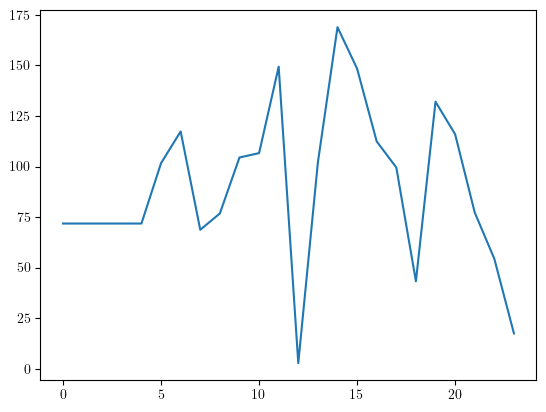

In [18]:
plt.plot(df["小时"],df["预测货量"])


In [50]:
fml = [650, 225, 325, 50, 175, 75]
tmp = [0, 220, 100, 340, 20, 0]

In [51]:
[4,9,12,16,18,20]

[4, 9, 12, 16, 18, 20]

In [68]:
fml = [4 for _ in range(int(650/8))]+[9 for _ in range(int(225/8))]+[12 for _ in range(int(325/8))]+[16 for _ in range(int(50/8))]+[18 for _ in range(int(175/8))]+[20 for _ in range(int(75/8))]

tmp = [9 for _ in range(int(220/8))]+[12 for _ in range(int(100/8))]+[16 for _ in range(int(340/8))]+[18 for _ in range(int(20/8))]

In [74]:
# 指定分组个数
n_bins = 6

fig = plt.figure(figsize=(8, 5))
ax: Axes = plt.axes()

x_multi = []

ax.plot(df["小时"], df["预测货量"], label=r"\begin{CJK*}{UTF8}{gbsn}预测货量\end{CJK*}")
# 实际绘图代码与单类型直方图差异不大，只是增加了一个图例项
# 在 ax.hist 函数中先指定图例 label 名称
ax.hist(
    [fml, tmp],
    n_bins,
    histtype="bar",
    label=[
        r"\begin{CJK*}{UTF8}{gbsn}正式员工\end{CJK*}",
        r"\begin{CJK*}{UTF8}{gbsn}临时员工\end{CJK*}",
    ],
)

# ax.set_title('多类型直方图')
ax.set_xlabel(r"\begin{CJK*}{UTF8}{gbsn}时间\end{CJK*}")
ax.set_ylabel(r"\begin{CJK*}{UTF8}{gbsn}货物量\end{CJK*}")
# 通过 ax.legend 函数来添加图例
ax.legend()

with PdfPages("pb.pdf") as pdf:
    pdf.savefig()
    
    plt.close()

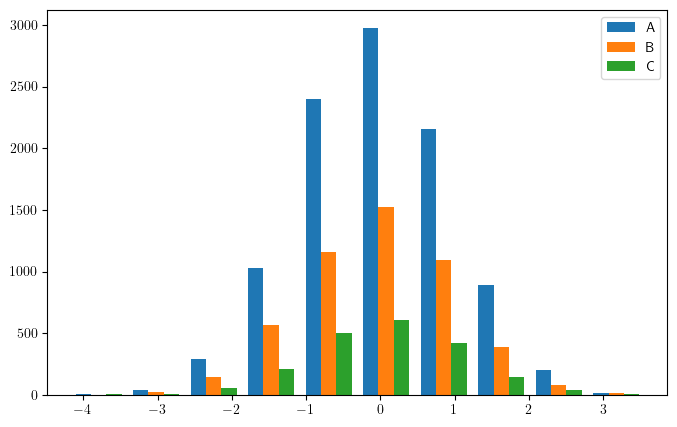

In [33]:
# 指定分组个数
n_bins=10

fig,ax=plt.subplots(figsize=(8,5))

# 分别生成10000 ， 5000 ， 2000 个值
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]


# 实际绘图代码与单类型直方图差异不大，只是增加了一个图例项
# 在 ax.hist 函数中先指定图例 label 名称
ax.hist(x_multi, n_bins, histtype='bar',label=list("ABC"))


# 通过 ax.legend 函数来添加图例
ax.legend()

plt.show()

10000